<a href="https://colab.research.google.com/github/paparrigopoul20/example/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports 
from keras.preprocessing.image import load_img 

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from random import randint
import pandas as pd
import pickle

import scipy.io

import joblib
from joblib import dump, load
from PIL import Image

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statistics

In [ ]:
#import the classifiers
from sklearn import datasets, neighbors, linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# Machine Learning

Experiments: Experimental settings

In [ ]:
# method partly taken from https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

def resize_all(src, pklname, include):
   """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata.The dictionary is written to a pickle file 
    named '{pklname}.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    include: set[str]
        set containing str
    """
     
    data = dict()
    data['label'] = []
    data['filename'] = []
    data['data'] = []
     
    #DESTINATION_PATH
    pklname = f"{pklname}.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for file in os.listdir(src):
        if file[:5] in include:
          img = load_img(os.path.join(src, file), target_size=(224,224))
          img_array = np.array(img) 
          data['label'].append(file[:5])
          data['filename'].append(file)
          data['data'].append(img_array)
            
 
        joblib.dump(data, pklname)

In [ ]:
#unzip the file with documentary images from https://www.baylor.edu/classics/index.php?id=958431
%%capture
!unzip CDDGB.zip

In [ ]:
# modify to fit your system
data_path ='CDDGB/'
base_name = 'CDDGB'

#Define the centuries we are interested in
include = {'3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'}
resize_all(data_path, pklname=base_name, include=include)

In [ ]:
from collections import Counter

data =joblib.load(f'{base_name}.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  255
keys:  ['label', 'filename', 'data', 'img']
image shape:  (224, 224, 3)
labels: ['1stAD' '1stBC' '2ndAD' '3rdAD' '4thAD' '5thAD' '6thAD' '7thAD' '8thAD'
 '9thAD']


Counter({'1stAD': 20,
         '1stBC': 1,
         '2ndAD': 87,
         '3rdAD': 71,
         '4thAD': 18,
         '5thAD': 7,
         '6thAD': 13,
         '7thAD': 2,
         '8thAD': 6,
         '9thAD': 30})

In [ ]:
#get a list of just the features
X = np.array(data['data'])
y = np.array(data['label'])
X.shape

(255, 224, 224, 3)

In [ ]:
#concatenate the three channels
X=np.reshape(X,(X.shape[0], -1))
X.shape

(255, 150528)

In [ ]:
#perform dimensionality reduction with Principal Component Analysis (PCA), keeping the top one hundred principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=22)
pca.fit(X)
X = pca.transform(X)
X.shape

(255, 100)

In [ ]:
# normalizing
X_images = X / X.max()
y_images = y

Create three random train/test splits (80/20).

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_images, y_images, test_size=0.20)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_images, y_images, test_size=0.20)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_images, y_images, test_size=0.20)

In [ ]:
#Save the train/test splits into a dictionary

ML_train_test= {}
ML_train_test['X_train1']=(X_train1)
ML_train_test['X_test1']=(X_test1)
ML_train_test['y_train1']=(y_train1)
ML_train_test['y_test1']=(y_test1)

ML_train_test['X_train2']=(X_train2)
ML_train_test['X_test2']=(X_test2)
ML_train_test['y_train2']=(y_train2)
ML_train_test['y_test2']=(y_test2)

ML_train_test['X_train3']=(X_train3)
ML_train_test['X_test3']=(X_test3)
ML_train_test['y_train3']=(y_train3)
ML_train_test['y_test3']=(y_test3)

#write the dictionary to a pickle file
pklname = "MLlit_train_test.pkl"
joblib.dump(ML_train_test, pklname)

['MLlit_train_test.pkl']

**Naive Baselines**: one that always assigns the most frequent century (FREQUENT) and a random one that assigns a century at random (RANDOM)

In [ ]:
#Create a baseline that  always predicts the most frequent class in the training set.
from sklearn.dummy import DummyClassifier

base_clf= DummyClassifier(strategy='most_frequent', random_state=0)

#create a classifier that always predicts the most frequent class in the 1st training set
# and test it on the 1st test set
baseline1=base_clf.fit(X_train1, y_train1)
base_prediction1=base_clf.predict(X_test1)
base_drep1=classification_report(y_test1,base_prediction1,output_dict=True)

#create a classifier that always predicts the most frequent class in the 2nd training set
# and test it on the 2nd test set
baseline2=base_clf.fit(X_train2, y_train2)
base_prediction2=base_clf.predict(X_test2)
base_drep2=classification_report(y_test2,base_prediction2,output_dict=True)

#create a classifier that always predicts the most frequent class in the 3rd training set
# and test it on the 3rd test set
baseline3=base_clf.fit(X_train3, y_train3)
base_prediction3=base_clf.predict(X_test3)
base_drep3=classification_report(y_test3,base_prediction3,output_dict=True)

#compute the mean scores of the three naive classifiers
df = pd.DataFrame([base_drep1,base_drep2,base_drep3],index=['rep1', 'rep2', 'rep3'])
lis=[]
for i in df:
  lis.append(pd.DataFrame(df[i].apply(pd.Series)))

base_dreport=pd.DataFrame()
for i in lis:
  a=i.mean()
  base_dreport=base_dreport.append(a,ignore_index=True)

base_dreport=base_dreport.rename(columns={base_dreport.columns[4]: "mean score"})
base_dreport=base_dreport.drop(columns=['support'])
base_dreport.index= [i for i in df.columns] 
print(base_dreport)

#save the scores to an excel file
base_dreport.to_excel("literML_outputs.xlsx",
             sheet_name='most_frequent') 

              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.484848   0.320261  1.000000         NaN
3rdAD         0.000000   0.000000  0.000000         NaN
4thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
9thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.320261
macro avg     0.057311   0.037877  0.117989         NaN
weighted avg  0.155674   0.102909  0.320261         NaN
5thAD         0.000000   0.000000  0.000000         NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Create a baseline that assigns a century at random.

base2_clf= DummyClassifier(strategy='uniform', random_state=0)

#create a classifier that always assigns a century at random
# and test it on the 1st test set
baseline1=base2_clf.fit(X_train1, y_train1)
base_prediction1=base2_clf.predict(X_test1)
base_drep1=classification_report(y_test1,base_prediction1,output_dict=True)

#create a classifier that always assigns a century at random
# and test it on the 2nd test set
baseline2=base2_clf.fit(X_train2, y_train2)
base_prediction2=base2_clf.predict(X_test2)
base_drep2=classification_report(y_test2,base_prediction2,output_dict=True)

#create a classifier that always assigns a century at random
# and test it on the 3rd test set
baseline3=base2_clf.fit(X_train3, y_train3)
base_prediction3=base2_clf.predict(X_test3)
base_drep3=classification_report(y_test3,base_prediction3,output_dict=True)

#compute the mean scores of the three naive classifiers
df = pd.DataFrame([base_drep1,base_drep2,base_drep3],index=['rep1', 'rep2', 'rep3'])
lis=[]
for i in df:
  lis.append(pd.DataFrame(df[i].apply(pd.Series)))

base_dreport=pd.DataFrame()
for i in lis:
  a=i.mean()
  base_dreport=base_dreport.append(a,ignore_index=True)

base_dreport=base_dreport.rename(columns={base_dreport.columns[4]: "mean score"})
base_dreport=base_dreport.drop(columns=['support'])
base_dreport.index= [i for i in df.columns] 
print(base_dreport)

#add the new outputs to the excel file
with pd.ExcelWriter("literML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
     base_dreport.to_excel(writer,
                       sheet_name="random")

              f1-score  precision    recall  mean score
1stAD         0.171717   0.142857  0.216667         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.126984   0.333333  0.078431         NaN
3rdAD         0.118421   0.183333  0.093651         NaN
4thAD         0.095238   0.066667  0.166667         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
9thAD         0.051282   0.055556  0.047619         NaN
accuracy           NaN        NaN       NaN    0.091503
macro avg     0.056364   0.078175  0.060303         NaN
weighted avg  0.105679   0.188998  0.091503         NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results of the machine learning

In [ ]:
##Classification Cross Validation

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

for classifier in classifiers:

  #get the name of each classifier
  name = classifier.__class__.__name__

  #train each classifier on the 1st training set and test it on the 1st test set
  classifier.fit(X_train1, y_train1)
  #save the classifier
  dump(classifier, f'{name}1_MLlit.joblib')
  #test the classifier
  predictions1=classifier.predict(X_test1)
  rep1=classification_report(y_test1, predictions1,output_dict=True)

  #train each classifier on the 2nd training set and test it on the 2nd test set
  classifier.fit(X_train2, y_train2)
  #save the classifier
  dump(classifier, f'{name}2_MLlit.joblib')
  #test the classifier
  predictions2=classifier.predict(X_test2)
  rep2=classification_report(y_test2, predictions2,output_dict=True)
  
  #train each classifier on the 3rd training set and test it on the 3rd test set
  classifier.fit(X_train3, y_train3)
  #save the classifier
  dump(classifier, f'{name}3_MLlit.joblib')
  #test the classifier
  predictions3=classifier.predict(X_test3)
  rep3=classification_report(y_test3, predictions3,output_dict=True)

  #print the name of each classifier along with its three classification reports and compute their mean scores
  df = pd.DataFrame([rep1,rep2,rep3],index=['rep1', 'rep2', 'rep3'])
  lis=[]
  for i in df:
    lis.append(pd.DataFrame(df[i].apply(pd.Series)))

  report=pd.DataFrame()
  for i in lis:
    a=i.mean()
    report=report.append(a,ignore_index=True)
  report=report.rename(columns={report.columns[4]: "mean score"})
  report=report.drop(columns=['support'])
  report.index= [i for i in df.columns] 

  print("********************************")
  print(name,)
  print("********************************")
  print(report)
  print("********************************")
  print(rep1)
  print(rep2)
  print(rep3)
  
  #save the outputs to the excel file
  with pd.ExcelWriter("literML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
      report.to_excel(writer,
                      sheet_name=name)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
KNeighborsClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.066667   0.055556  0.083333         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.528664   0.444444  0.653595         NaN
3rdAD         0.410245   0.611111  0.321429         NaN
4thAD         0.459836   0.450794  0.500000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.688889   0.611111  0.833333         NaN
9thAD         0.514815   0.481481  0.562831         NaN
accuracy           NaN        NaN       NaN    0.457516
macro avg     0.335581   0.342963  0.367847         NaN
weighted avg  0.429531   0.455291  0.457516         NaN
5thAD         0.666667   1.000000  0.500000         NaN
********************************
{'1stAD': {'precision': 0.16666666666666666, 'recall': 0.25, 'f1-score': 0.2, 'support': 4}, '1s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
SVC
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.516829   0.364515  0.899346         NaN
3rdAD         0.325397   0.496296  0.253175         NaN
4thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
9thAD         0.494017   0.866667  0.394180         NaN
accuracy           NaN        NaN       NaN    0.411765
macro avg     0.155870   0.201016  0.180228         NaN
weighted avg  0.325680   0.387591  0.411765         NaN
5thAD         0.000000   0.000000  0.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '1stBC': {'precision': 0.0, 'recall':

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

********************************
RandomForestClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.417842   0.331373  0.567320         NaN
3rdAD         0.335376   0.309691  0.382540         NaN
4thAD         0.488889   1.000000  0.333333         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.333333   0.333333  0.333333         NaN
9thAD         0.730920   0.958333  0.610450         NaN
accuracy           NaN        NaN       NaN    0.418301
macro avg     0.304253   0.387123  0.288549         NaN
weighted avg  0.391367   0.435394  0.418301         NaN
5thAD         0.666667   1.000000  0.500000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '1stBC': {'precisi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
GaussianProcessClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.478876   0.321591  0.938562         NaN
3rdAD         0.225000   0.450000  0.150000         NaN
4thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
9thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.339869
macro avg     0.080022   0.085080  0.126499         NaN
weighted avg  0.212449   0.220866  0.339869         NaN
5thAD         0.000000   0.000000  0.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '1stBC': {'prec

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

********************************
MLPClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.470355   0.332034  0.818301         NaN
3rdAD         0.265246   0.318981  0.251587         NaN
4thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
9thAD         0.150000   0.666667  0.084656         NaN
accuracy           NaN        NaN       NaN    0.339869
macro avg     0.100561   0.145808  0.133689         NaN
weighted avg  0.244241   0.297492  0.339869         NaN
5thAD         0.000000   0.000000  0.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '1stBC': {'precision': 0.0,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compute MAE and MSE

In [ ]:
#To compute the mean absolute and the mean squared error we must convert string values in ground truth (y_dtests) and in predictions to numeric ones

#Convert to numeric values
def to_numeric(array):
  #create a dictionary with keys the string values and values their corresponding numeric values
  dictionary = dict(zip(('3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'), (-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9)))
  
  #Convert the strings to numbers using the dictionary and add the new values into a list
  numbers=[]
  for i in array:
    i=dictionary[i]
    numbers.append(i)
  #convert the list with the numeric values into an array
  array=np.array(numbers)
  return array

#Use the above function to convert the ground truth (y_dtests) to numeric values
y_num_test1=to_numeric(y_test1)
y_num_test2=to_numeric(y_test2)
y_num_test3=to_numeric(y_test3)

In [ ]:
# Compute mean absolute and mean squared error


classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]
lit_mean_errors=pd.DataFrame()

for classifier in classifiers:
   #Create three models, one for each of the three randomly splitted train/test sets

   #get the name of each classifier
   name = classifier.__class__.__name__

   #print the name of each classifier along with its three classification reports and compute their mean accuracy score
  
   clf= load(f'{name}1_MLlit.joblib')
   predicted1=clf.predict(X_test1)
   #convert the predicted values to numeric using the "to numeric" function
   predicted1=to_numeric(predicted1)
   MAE1=mean_absolute_error(y_num_test1, predicted1)
   MSE1=mean_squared_error(y_num_test1, predicted1)

   clf= load(f'{name}2_MLlit.joblib') 
   predicted2=clf.predict(X_test2)
   predicted2=to_numeric(predicted2)
   MAE2=mean_absolute_error(y_num_test2, predicted2)
   MSE2=mean_squared_error(y_num_test2, predicted2)
       
   clf= load(f'{name}3_MLlit.joblib')  
   predicted3=clf.predict(X_test3)
   predicted3=to_numeric(predicted3)
   MAE3=mean_absolute_error(y_num_test3, predicted3)
   MSE3=mean_squared_error(y_num_test3, predicted3)

   #compute the mean absolute and the mean squared error of the three models
   MAE=statistics.mean([MAE1,MAE2,MAE3])
   MSE=statistics.mean([MSE1,MSE2,MSE3])
    
   lit_mean_errors.insert(0,classifier.__class__.__name__, [MAE, MSE], True )
    
   print("********************************")
   print(name,)

   print(f"Mean Absolute Error:{MAE}")
   print(f"Mean Squared Error:{MSE}")

   print(f"MAE1:{MAE1}, MAE2:{MAE2}, MAE3:{MAE3}")
   print(f"MSE1:{MSE1}, MSE2:{MSE2}, MSE3:{MSE3}")
  
lit_mean_errors=lit_mean_errors.rename(index={0: "MAE", 1: "MSE"})
print(lit_mean_errors)

#save the outputs to the excel file
with pd.ExcelWriter("literML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
      lit_mean_errors.to_excel(writer,
                      sheet_name="mean_errors")


********************************
KNeighborsClassifier
Mean Absolute Error:1.588235294117647
Mean Squared Error:7.575163398692811
MAE1:1.2352941176470589, MAE2:1.8235294117647058, MAE3:1.7058823529411764
MSE1:4.921568627450981, MSE2:9.352941176470589, MSE3:8.450980392156863
********************************
SVC
Mean Absolute Error:1.522875816993464
Mean Squared Error:6.908496732026144
MAE1:1.9607843137254901, MAE2:1.3529411764705883, MAE3:1.2549019607843137
MSE1:10.07843137254902, MSE2:5.705882352941177, MSE3:4.9411764705882355
********************************
DecisionTreeClassifier
Mean Absolute Error:2.2026143790849675
Mean Squared Error:10.124183006535947
MAE1:2.0980392156862746, MAE2:2.0588235294117645, MAE3:2.450980392156863
MSE1:9.470588235294118, MSE2:9.392156862745098, MSE3:11.509803921568627
********************************
RandomForestClassifier
Mean Absolute Error:1.2679738562091503
Mean Squared Error:4.980392156862745
MAE1:1.1568627450980393, MAE2:1.5294117647058822, MAE3:1.1

In [ ]:
lit_mean_errors

,MLPClassifier,GaussianProcessClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC,KNeighborsClassifier
MAE,1.895425,2.039216,1.267974,2.202614,1.522876,1.588235
MSE,9.267974,10.470588,4.980392,10.124183,6.908497,7.575163


# Follow the same stems for the documentary papyri

Experimental settings

In [ ]:
#unzip the file with documentary images from https://www.baylor.edu/classics/index.php?id=958431
%%capture
!unzip pappalall.zip

In [ ]:
# modify to fit your system 
data_path ='pappal/'
base_name = 'pappal'

#Define the centuries we are interested in
include = {'3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'}
resize_all(data_path, pklname=base_name, include=include)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (130844949 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (128929136 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99840557 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (116601255 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93639392 pixels) exceeds limit of 8947848

In [ ]:
from collections import Counter
base_name="pappal"
doc_data =joblib.load(f'{base_name}.pkl')

print('number of samples: ', len(doc_data['data']))
print('keys: ', list(doc_data.keys()))
print('image shape: ', doc_data['data'][0].shape)
print('labels:', np.unique(doc_data['label']))
 
Counter(doc_data['label'])

number of samples:  3326
keys:  ['label', 'filename', 'data', 'img']
image shape:  (224, 224, 3)
labels: ['1stAD' '1stBC' '2ndAD' '2ndBC' '3rdAD' '3rdBC' '4thAD' '5thAD' '6thAD'
 '7thAD' '8thAD']


Counter({'1stAD': 341,
         '1stBC': 109,
         '2ndAD': 326,
         '2ndBC': 581,
         '3rdAD': 346,
         '3rdBC': 814,
         '4thAD': 297,
         '5thAD': 162,
         '6thAD': 257,
         '7thAD': 64,
         '8thAD': 29})

In [ ]:
# get a list of just the features
X_doc = np.array(doc_data['data'])
y_doc = np.array(doc_data['label'])
X_doc.shape

(3326, 224, 224, 3)

In [ ]:
#concatenate the three channels
X_doc=np.reshape(X_doc,(X_doc.shape[0], -1))
X_doc.shape

(3326, 150528)

In [ ]:
#perform dimensionality reduction with Principal Component Analysis (PCA), keeping the top one hundred principal components

pca = PCA(n_components=100, random_state=22)
pca.fit(X_doc)
X = pca.transform(X_doc)
X.shape

(3326, 100)

In [ ]:
#normalizing
X_doc_images = X / X.max()
y_doc_images = y_doc

n_doc_samples = len(X_doc_images)

Create three random train/test splits (80/20).

In [ ]:
from sklearn.model_selection import train_test_split
X_dtrain1, X_dtest1, y_dtrain1, y_dtest1 = train_test_split(X_doc_images, y_doc_images, test_size=0.20)

In [ ]:
X_dtrain2, X_dtest2, y_dtrain2, y_dtest2= train_test_split(X_doc_images, y_doc_images, test_size=0.20)

In [ ]:
X_dtrain3, X_dtest3, y_dtrain3, y_dtest3= train_test_split(X_doc_images, y_doc_images, test_size=0.20)

In [ ]:
#Save the train/test splits into a dictionary

ML_dtrain_test= {}
ML_dtrain_test['X_dtrain1']=(X_dtrain1)
ML_dtrain_test['X_dtest1']=(X_dtest1)
ML_dtrain_test['y_dtrain1']=(y_dtrain1)
ML_dtrain_test['y_dtest1']=(y_dtest1)

ML_dtrain_test['X_dtrain2']=(X_dtrain2)
ML_dtrain_test['X_dtest2']=(X_dtest2)
ML_dtrain_test['y_dtrain2']=(y_dtrain2)
ML_dtrain_test['y_dtest2']=(y_dtest2)

ML_dtrain_test['X_dtrain3']=(X_dtrain3)
ML_dtrain_test['X_dtest3']=(X_dtest3)
ML_dtrain_test['y_dtrain3']=(y_dtrain3)
ML_dtrain_test['y_dtest3']=(y_dtest3)

#write the dictionary to a pickle file
pklname = "MLdoc_train_test.pkl"
joblib.dump(ML_dtrain_test, pklname)

['MLdoc_train_test.pkl']

**Naive Baselines**: one that always assigns the most frequent century (FREQUENT) and a random one that assigns a century at random (RANDOM)

In [ ]:
#Create a baseline that  always predicts the most frequent class in the training set.
from sklearn.dummy import DummyClassifier

base_clf= DummyClassifier(strategy='most_frequent', random_state=0)

#create a classifier that always predicts the most frequent class in the 1st training set
# and test it on the 1st test set
baseline1=base_clf.fit(X_dtrain1, y_dtrain1)
base_dprediction1=base_clf.predict(X_dtest1)
base_drep1=classification_report(y_dtest1,base_dprediction1,output_dict=True)

#create a classifier that always predicts the most frequent class in the 2nd training set
# and test it on the 2nd test set
baseline2=base_clf.fit(X_dtrain2, y_dtrain2)
base_dprediction2=base_clf.predict(X_dtest2)
base_drep2=classification_report(y_dtest2,base_dprediction2,output_dict=True)

#create a classifier that always predicts the most frequent class in the 3rd training set
# and test it on the 3rd test set
baseline3=base_clf.fit(X_dtrain3, y_dtrain3)
base_dprediction3=base_clf.predict(X_dtest3)
base_drep3=classification_report(y_dtest3,base_dprediction3,output_dict=True)


#compute the mean scores of the three naive classifiers
df = pd.DataFrame([base_drep1,base_drep2,base_drep3],index=['rep1', 'rep2', 'rep3'])
lis=[]
for i in df:
  lis.append(pd.DataFrame(df[i].apply(pd.Series)))

base_dreport=pd.DataFrame()
for i in lis:
  a=i.mean()
  base_dreport=base_dreport.append(a,ignore_index=True)

base_dreport=base_dreport.rename(columns={base_dreport.columns[4]: "mean score"})
base_dreport=base_dreport.drop(columns=['support'])
base_dreport.index= [i for i in df.columns] 
print(base_dreport)

#save the scores to an excel file
base_dreport.to_excel("docML_outputs.xlsx",
             sheet_name='most_frequent') 

              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.000000   0.000000  0.000000         NaN
2ndBC         0.000000   0.000000  0.000000         NaN
3rdAD         0.000000   0.000000  0.000000         NaN
3rdBC         0.405417   0.254254  1.000000         NaN
4thAD         0.000000   0.000000  0.000000         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.000000   0.000000  0.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.254254
macro avg     0.036856   0.023114  0.090909         NaN
weighted avg  0.103091   0.064655  0.254254         NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Create a baseline that assigns a century at random.

base2_clf= DummyClassifier(strategy='uniform', random_state=0)

#create a classifier that always assigns a century at random
# and test it on the 1st test set
baseline1=base2_clf.fit(X_dtrain1, y_dtrain1)
base_dprediction1=base2_clf.predict(X_dtest1)
base_drep1=classification_report(y_dtest1,base_dprediction1,output_dict=True)

#create a classifier that always assigns a century at random
# and test it on the 2nd test set
baseline2=base2_clf.fit(X_dtrain2, y_dtrain2)
base_dprediction2=base2_clf.predict(X_dtest2)
base_drep2=classification_report(y_dtest2,base_dprediction2,output_dict=True)

#create a classifier that always assigns a century at random
# and test it on the 3rd test set
baseline3=base2_clf.fit(X_dtrain3, y_dtrain3)
base_dprediction3=base2_clf.predict(X_dtest3)
base_drep3=classification_report(y_dtest3,base_dprediction3,output_dict=True)

#compute the mean scores of the three naive classifiers
df = pd.DataFrame([base_drep1,base_drep2,base_drep3],index=['rep1', 'rep2', 'rep3'])
lis=[]
for i in df:
  lis.append(pd.DataFrame(df[i].apply(pd.Series)))

base_dreport=pd.DataFrame()
for i in lis:
  a=i.mean()
  base_dreport=base_dreport.append(a,ignore_index=True)

base_dreport=base_dreport.rename(columns={base_dreport.columns[4]: "mean score"})
base_dreport=base_dreport.drop(columns=['support'])
base_dreport.index= [i for i in df.columns] 
print(base_dreport)

#add the new outputs to the excel file
with pd.ExcelWriter("docML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
     base_dreport.to_excel(writer,
                       sheet_name="random")


              f1-score  precision    recall  mean score
1stAD         0.103245   0.116667  0.093293         NaN
1stBC         0.035670   0.024242  0.069963         NaN
2ndAD         0.123214   0.127778  0.119337         NaN
2ndBC         0.127869   0.154472  0.109142         NaN
3rdAD         0.092373   0.098361  0.087113         NaN
3rdBC         0.141700   0.267760  0.096346         NaN
4thAD         0.080603   0.080247  0.081115         NaN
5thAD         0.058169   0.047619  0.075441         NaN
6thAD         0.052324   0.046875  0.059720         NaN
7thAD         0.035812   0.021505  0.108469         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.093594
macro avg     0.077362   0.089593  0.081813         NaN
weighted avg  0.106869   0.144808  0.093594         NaN


Results of the machine learning

In [ ]:
#Classification Cross Validation

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

for classifier in classifiers:
  #Create three models, one for each of the three randomly splitted train/test sets

  #get the name of each classifier
  name = classifier.__class__.__name__

  #train each classifier on the 1st training set and test it on the 1st test set
  classifier.fit(X_dtrain1, y_dtrain1)
  #save the classifier
  dump(classifier, f'{name}1_MLdoc.joblib')
  #test the classifier
  predictions1=classifier.predict(X_dtest1)
  rep1=classification_report(y_dtest1, predictions1,output_dict=True)

  #train each classifier on the 2nd training set and test it on the 2nd test set
  classifier.fit(X_dtrain2, y_dtrain2)
  #save the classifier
  dump(classifier, f'{name}2_MLdoc.joblib')
  #test the classifier
  predictions2=classifier.predict(X_dtest2)
  rep2=classification_report(y_dtest2, predictions2,output_dict=True)

  #train each classifier on the 3rd training set and test it on the 3rd test set
  classifier.fit(X_dtrain3, y_dtrain3)
  #save the classifier
  dump(classifier, f'{name}3_MLdoc.joblib') 
  #test the classifier
  predictions3=classifier.predict(X_dtest3)
  rep3=classification_report(y_dtest3, predictions3,output_dict=True)

  #print the name of each classifier along with its three classification reports and compute their mean scores
  df = pd.DataFrame([rep1,rep2,rep3],index=['rep1', 'rep2', 'rep3'])
  lis=[]
  for i in df:
    lis.append(pd.DataFrame(df[i].apply(pd.Series)))

  report=pd.DataFrame()
  for i in lis:
    a=i.mean()
    report=report.append(a,ignore_index=True)
  report=report.rename(columns={report.columns[4]: "mean score"})
  report=report.drop(columns=['support'])
  report.index= [i for i in df.columns] 

  print("********************************")
  print(name,)
  print("********************************")
  print(report)
  print("********************************")
  print(rep1)
  print(rep2)
  print(rep3)

  #save the scores to the excel file
  with pd.ExcelWriter("docML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
      report.to_excel(writer,
                      sheet_name=name)
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
KNeighborsClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.288281   0.236849  0.372751         NaN
1stBC         0.190719   0.184470  0.198901         NaN
2ndAD         0.202780   0.185519  0.225108         NaN
2ndBC         0.663112   0.597617  0.745696         NaN
3rdAD         0.194723   0.223639  0.173117         NaN
3rdBC         0.506396   0.581410  0.448642         NaN
4thAD         0.332366   0.300354  0.379690         NaN
5thAD         0.274286   0.444017  0.198765         NaN
6thAD         0.386252   0.477978  0.333501         NaN
7thAD         0.035088   0.083333  0.022222         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.395896
macro avg     0.279455   0.301381  0.281672         NaN
weighted avg  0.391894   0.409736  0.395896         NaN
********************************
{'1stAD': {'precision': 0.23148148148148

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
SVC
********************************
              f1-score  precision    recall  mean score
1stAD         0.331774   0.365801  0.313691         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.069557   0.225397  0.041720         NaN
2ndBC         0.661435   0.579221  0.770916         NaN
3rdAD         0.186449   0.246235  0.150115         NaN
3rdBC         0.562766   0.447617  0.757710         NaN
4thAD         0.364557   0.400292  0.343434         NaN
5thAD         0.134615   0.516667  0.077954         NaN
6thAD         0.370378   0.344976  0.406133         NaN
7thAD         0.041667   0.333333  0.022222         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.442442
macro avg     0.247564   0.314504  0.262172         NaN
weighted avg  0.385038   0.393058  0.442442         NaN
********************************
{'1stAD': {'precision': 0.4, 'recall': 0.2409638554216867

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
RandomForestClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.264598   0.415593  0.198374         NaN
1stBC         0.100882   1.000000  0.053297         NaN
2ndAD         0.122936   0.298830  0.078324         NaN
2ndBC         0.637221   0.589384  0.693639         NaN
3rdAD         0.157467   0.248288  0.115708         NaN
3rdBC         0.502938   0.363011  0.818456         NaN
4thAD         0.326696   0.450058  0.258460         NaN
5thAD         0.134209   0.916667  0.073942         NaN
6thAD         0.361250   0.520334  0.279470         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.417417
macro avg     0.237109   0.436560  0.233606         NaN
weighted avg  0.359325   0.449095  0.417417         NaN
********************************
{'1stAD': {'precision': 0.466666666666

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
GaussianProcessClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.159124   0.391667  0.106693         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.017544   0.060606  0.010256         NaN
2ndBC         0.597758   0.498053  0.747902         NaN
3rdAD         0.073411   0.151936  0.048568         NaN
3rdBC         0.502689   0.371096  0.779038         NaN
4thAD         0.281913   0.335271  0.246663         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.229414   0.234802  0.226126         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.382883
macro avg     0.169259   0.185766  0.196841         NaN
weighted avg  0.298476   0.291215  0.382883         NaN
********************************
{'1stAD': {'precision': 0.3, 'recal

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


********************************
MLPClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.329413   0.339017  0.325313         NaN
1stBC         0.043011   0.133333  0.025641         NaN
2ndAD         0.072820   0.104946  0.056738         NaN
2ndBC         0.636235   0.577712  0.708148         NaN
3rdAD         0.157716   0.180931  0.139820         NaN
3rdBC         0.566014   0.514311  0.629802         NaN
4thAD         0.286606   0.262660  0.316432         NaN
5thAD         0.172728   0.214045  0.148192         NaN
6thAD         0.370516   0.337823  0.412645         NaN
7thAD         0.092593   0.444444  0.052525         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.404905
macro avg     0.247968   0.282657  0.255932         NaN
weighted avg  0.377641   0.369010  0.404905         NaN
********************************
{'1stAD': {'precision': 0.25806451612903225, 'r

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Compute MAE and MSE

In [ ]:
#To compute the mean absolute and the mean squared error we must convert string values in ground truth (y_dtests) and in predictions to numeric ones

#Convert to numeric values
def to_numeric(array):
  #create a dictionary with keys the string values and values their corresponding numeric values
  dictionary = dict(zip(('3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'), (-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9)))
  
  #Convert the strings to numbers using the dictionary and add the new values into a list
  numbers=[]
  for i in array:
    i=dictionary[i]
    numbers.append(i)
  #convert the list with the numeric values into an array
  array=np.array(numbers)
  return array

#Use the above function to convert the ground truth (y_dtests) to numeric values
y_num_dtest1=to_numeric(y_dtest1)
y_num_dtest2=to_numeric(y_dtest2)
y_num_dtest3=to_numeric(y_dtest3)

In [ ]:
# Compute mean absolute and mean squared error

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]
mean_errors=pd.DataFrame()

for classifier in classifiers:

   #Create three models, one for each of the three randomly splitted train/test sets

   #get the name of each classifier
   name = classifier.__class__.__name__

   #print the name of each classifier along with its three classification reports and compute their mean accuracy score
  
   clf= load(f'{name}1_MLdoc.joblib')
   predicted1=clf.predict(X_dtest1)
   #convert the predicted values to numeric using the "to numeric" function
   predicted1=to_numeric(predicted1)
   MAE1=mean_absolute_error(y_num_dtest1, predicted1)
   MSE1=mean_squared_error(y_num_dtest1, predicted1)

   clf= load(f'{name}2_MLdoc.joblib') 
   predicted2=clf.predict(X_dtest2)
   predicted2=to_numeric(predicted2)
   MAE2=mean_absolute_error(y_num_dtest2, predicted2)
   MSE2=mean_squared_error(y_num_dtest2, predicted2)
       
   clf= load(f'{name}3_MLdoc.joblib')  
   predicted3=clf.predict(X_dtest3)
   predicted3=to_numeric(predicted3)
   MAE3=mean_absolute_error(y_num_dtest3, predicted3)
   MSE3=mean_squared_error(y_num_dtest3, predicted3)

   #compute the mean absolute and the mean squared error of the three models
   MAE=statistics.mean([MAE1,MAE2,MAE3])
   MSE=statistics.mean([MSE1,MSE2,MSE3])
    
   mean_errors.insert(0,classifier.__class__.__name__, [MAE, MSE], True )
    
   print("********************************")
   print(name,)

   print(f"Mean Absolute Error:{MAE}")
   print(f"Mean Squared Error:{MSE}")

   print(f"MAE1:{MAE1}, MAE2:{MAE2}, MAE3:{MAE3}")
   print(f"MSE1:{MSE1}, MSE2:{MSE2}, MSE3:{MSE3}")
  
mean_errors=mean_errors.rename(index={0: "MAE", 1: "MSE"})
print(mean_errors)

#save the outputs to the excel file
with pd.ExcelWriter("docML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
      mean_errors.to_excel(writer,
                      sheet_name="mean_errors")


********************************
KNeighborsClassifier
Mean Absolute Error:2.123123123123123
Mean Squared Error:10.594594594594595
MAE1:2.2162162162162162, MAE2:2.1006006006006004, MAE3:2.0525525525525525
MSE1:11.21921921921922, MSE2:10.082582582582583, MSE3:10.481981981981981
********************************
SVC
Mean Absolute Error:2.2172172172172173
Mean Squared Error:12.697697697697699
MAE1:2.249249249249249, MAE2:2.280780780780781, MAE3:2.1216216216216215
MSE1:12.897897897897899, MSE2:13.334834834834835, MSE3:11.86036036036036
********************************
DecisionTreeClassifier
Mean Absolute Error:2.918918918918919
Mean Squared Error:16.496496496496498
MAE1:3.057057057057057, MAE2:2.954954954954955, MAE3:2.744744744744745
MSE1:17.54954954954955, MSE2:16.882882882882882, MSE3:15.057057057057056
********************************
RandomForestClassifier
Mean Absolute Error:2.646146146146146
Mean Squared Error:16.296796796796798
MAE1:2.6276276276276276, MAE2:2.7837837837837838, MAE3:2

In [ ]:
mean_errors

,MLPClassifier,GaussianProcessClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC,KNeighborsClassifier
MAE,2.171672,2.741241,2.646146,2.918919,2.217217,2.123123
MSE,11.488989,16.678178,16.296797,16.496496,12.697698,10.594595


**Analysis**

Learning Curves

In [ ]:
#training curves
from sklearn.metrics import accuracy_score
import statistics


classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

train_size=[500, 1000, 1500, 2000, len(X_dtrain1)]
#create a list to add classifiers' names
clf_name=[]
#create a list to add smaller lists, each of which will contain one's classifier accuracy scores
accuracy=[]

for clf in classifiers:
  #add the name of the classifier to the clf_name list
  clf_name.append(clf.__class__.__name__)
  #create an empty list to append the classifier's accuracy scores
  clf_acc=[]
  for size in train_size:

    #train three models(one for each of the three training-test splits) with the corresponding size of their training set 
    #and test them on their whole test set. 
    clf.fit(X_dtrain1[:size], y_dtrain1[:size])
    predictions1=clf.predict(X_dtest1)
    #compute the accuracy score of the classifier
    ac1=accuracy_score(y_dtest1, predictions1)

    #Do the same for the other two models    
    clf.fit(X_dtrain2[:size], y_dtrain2[:size])
    predictions2=clf.predict(X_dtest2)
    ac2=accuracy_score(y_dtest2, predictions2)

    clf.fit(X_dtrain3[:size], y_dtrain3[:size]) 
    predictions3=clf.predict(X_dtest3)
    ac3=accuracy_score(y_dtest3, predictions3)

    #add into the clf_acc list the mean accuracy score of the three models
    clf_acc.append(statistics.mean([ac1,ac2,ac3]))
    
  #add the clf_acc list with the mean accuracy scores of the classifier to the accuracy list
  accuracy.append(clf_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


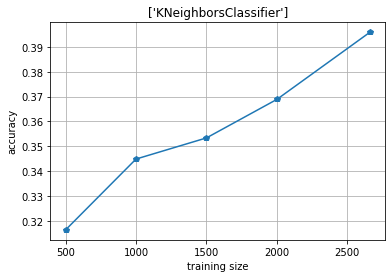

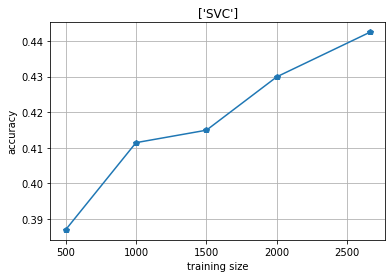

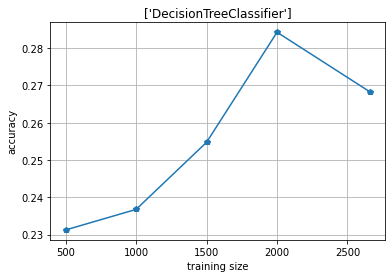

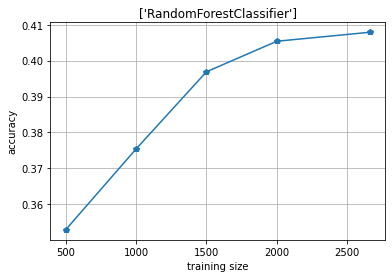

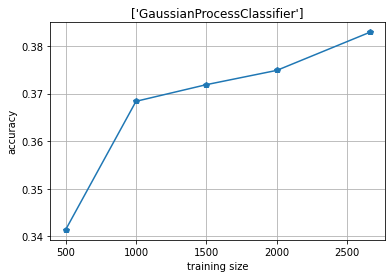

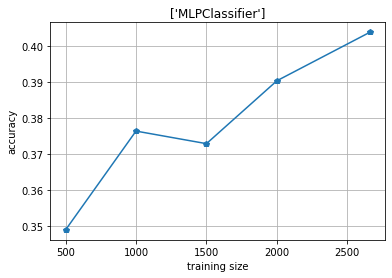

In [ ]:
#for each of the six classifiers make a plot with its learning curve
for i in range(6):
  x = train_size
  y=accuracy[i]

  #plt.plot(x, y, 'ro')
  fig, ax = plt.subplots()
  ax.plot(x, y, '-p')

  ax.set(xlabel='training size', ylabel='accuracy',
        title=[clf_name[i]])
  ax.grid()

  plt.show()  

In [ ]:
#create a dataframe with the classifiers accuracy scores as columns and training size as rows
fnames=[]
for i in range(len(classifiers)):
  lc=pd.DataFrame(accuracy[i],columns=[clf_name[i]],index=[l for l in train_size])
  fnames.append(lc)
learning_curves= pd.concat([f for f in fnames], axis=1)

#add the scores to the excel file
with pd.ExcelWriter("docML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
  learning_curves.to_excel(writer,
                           sheet_name="learning curves")

In [ ]:
learning_curves

,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,GaussianProcessClassifier,MLPClassifier
500,0.316316,0.386887,0.231231,0.352853,0.341341,0.348849
1000,0.344845,0.411411,0.236737,0.375375,0.368368,0.376376
1500,0.353353,0.414915,0.254755,0.396897,0.371872,0.372873
2000,0.368869,0.429930,0.284284,0.405405,0.374875,0.390390
2660,0.395896,0.442442,0.268268,0.407908,0.382883,0.403904


In [ ]:
#training curves

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

train_size=[500, 1000, 1500, 2000, len(X_dtrain1)]
#create a list to add classifiers' names
new_clf_name=[]
#create a list to add smaller lists, each of which will contain one's classifier accuracy scores
new_accuracy=[]

for clf in classifiers:
  #add the name of the classifier to the new_clf_name list
  new_clf_name.append(clf.__class__.__name__)
  #create an empty list to append the classifier's accuracy scores
  new_clf_acc=[]
  for size in train_size:

    #train three models(one for each of the three training-test splits) with the corresponding size of their training set 
    #and test them on the same training set. 
    clf.fit(X_dtrain1[:size], y_dtrain1[:size])
    predictions1=clf.predict(X_dtrain1[:size])
    #compute the accuracy score of the classifier
    ac1=accuracy_score(y_dtrain1[:size], predictions1)

    #Do the same for the other two models    
    clf.fit(X_dtrain2[:size], y_dtrain2[:size])
    predictions2=clf.predict(X_dtrain2[:size])
    ac2=accuracy_score(y_dtrain2[:size], predictions2)

    clf.fit(X_dtrain3[:size], y_dtrain3[:size]) 
    predictions3=clf.predict(X_dtrain3[:size])
    ac3=accuracy_score(y_dtrain3[:size], predictions3)

    #add into the new_clf_acc list the mean accuracy score of the three models
    new_clf_acc.append(statistics.mean([ac1,ac2,ac3]))
    
  #add the new_clf_acc list with the mean accuracy scores of the classifier to the new_accuracy list
  new_accuracy.append(new_clf_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


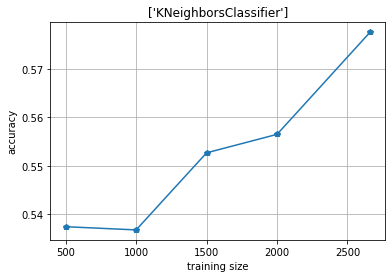

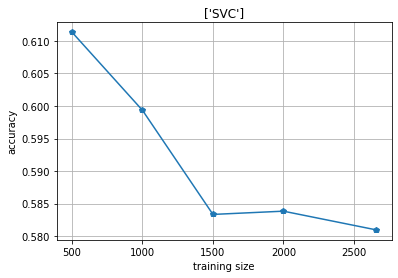

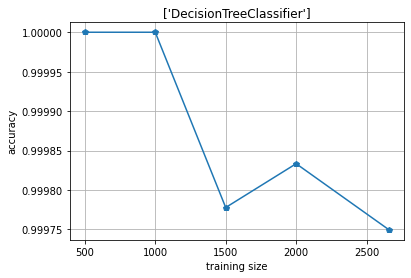

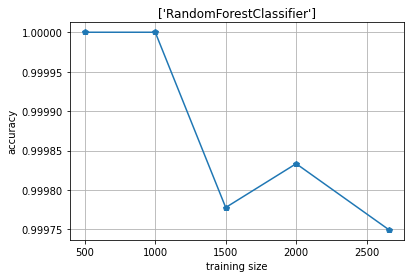

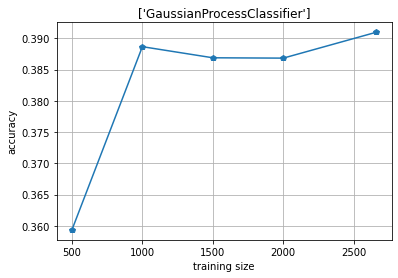

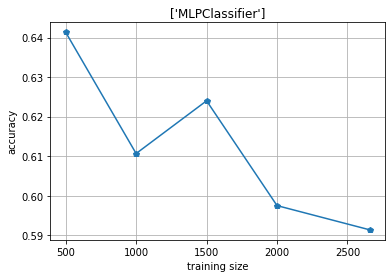

In [ ]:
#for each of the six classifiers make a plot with its learning curve
for i in range(6):
  x = train_size
  y=new_accuracy[i]

  #plt.plot(x, y, 'ro')
  fig, ax = plt.subplots()
  ax.plot(x, y, '-p')

  ax.set(xlabel='training size', ylabel='accuracy',
        title=[new_clf_name[i]])
  ax.grid()

  plt.show()  

In [ ]:
#create a dataframe with the classifiers accuracy scores as columns and training size as rows
fnames=[]
for i in range(len(classifiers)):
  lc=pd.DataFrame(new_accuracy[i],columns=[new_clf_name[i]],index=[l for l in train_size])
  fnames.append(lc)
new_learning_curves= pd.concat([f for f in fnames], axis=1)

#add the scores to the excel file
with pd.ExcelWriter("docML_outputs.xlsx", engine='openpyxl', mode='a') as writer:
  new_learning_curves.to_excel(writer,
                           sheet_name="new learning curves")

In [ ]:
new_learning_curves

,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,GaussianProcessClassifier,MLPClassifier
500,0.537333,0.611333,1.000000,1.000000,0.359333,0.641333
1000,0.536667,0.599333,1.000000,1.000000,0.388667,0.610667
1500,0.552667,0.583333,0.999778,0.999778,0.386889,0.624000
2000,0.556500,0.583833,0.999833,0.999833,0.386833,0.597500
2660,0.577694,0.580952,0.999749,0.999749,0.390977,0.591353
